In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from kid_readout.interactive import *

INFO     2016-10-07 09:42:38,485 - kid_readout.<module>:13  kid_readout logging setup with default stream handler
INFO:kid_readout:kid_readout logging setup with default stream handler


In [4]:
ncf = NCFile('/data/readout/2016-10-07_085722_20_dB_dac_thermal_pulse.nc',cache_s21_raw=True)

In [5]:
ssa1 = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)
ssa2 = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray2)

In [7]:
from kid_readout.analysis.timeseries import filters

In [8]:
up = []
down = []
for k in range(105):
    up.append(filters.low_pass_fir(ssa1.sweep_stream(k).x,num_taps=1024*8,cutoff=1/1500.,decimate_by=1024))
    down.append(filters.low_pass_fir(ssa2.sweep_stream(k).x,num_taps=1024*8,cutoff=1/1500.,decimate_by=1024))
up = np.array(up)
down = np.array(down)

/home/gjones/readout/kid_readout/kid_readout/analysis/timeseries/fftfilt.py:78: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i:k] = y[i:k] + yt[:k-i]            # and add


In [ ]:
filters.low_pass_fir()

In [9]:
s1 = ssa1.sweep_stream(1)

In [28]:
s2 = ssa2.sweep_stream(2)

In [22]:
s1.stream.description

u'stream while load is heating. load on at 1475845092.034031'

In [24]:
s1.start_epoch()

1475845044.0772159

In [26]:
stream_length=s1.x.shape[0]/(512e6/2**15)

In [27]:
stream_length

268.435456

In [29]:
uptime = s1.stream.start_epoch()+np.linspace(0,stream_length,up.shape[1])
downtime = s2.stream.start_epoch()+np.linspace(0,stream_length,up.shape[1])

In [10]:
up.shape

(105, 4088)

In [16]:
upm = up - up.min(1)[:,None]
downm = down - up.min(1)[:,None]

In [18]:
all = np.hstack((upm,downm))

In [19]:
all.shape

(105, 8176)

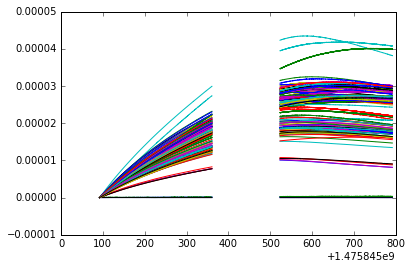

In [32]:
_=plot(uptime,upm.T)
_=plot(downtime,downm.T)
#yscale('log')

In [46]:
order=up.max(1).argsort()

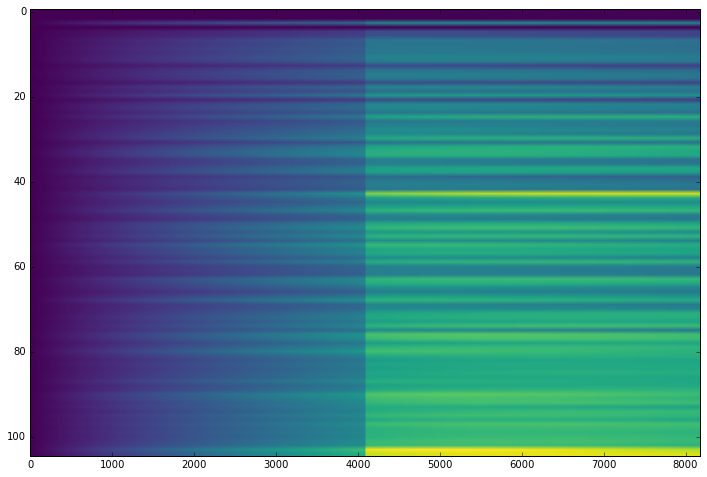

In [48]:
figure(figsize=(12,8))
imshow((all)[order,:],aspect='auto',cmap=cm.viridis)
#clim(0,1)

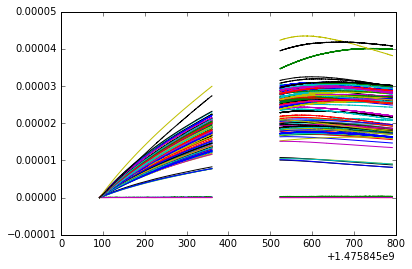

In [49]:
_=plot(uptime,upm[order,:].T)
_=plot(downtime,downm[order,:].T)

In [50]:
from kid_readout.equipment import starcryo_temps

updated file list


In [85]:
package_up,_,load_up,_=starcryo_temps.get_temperatures_at(uptime-40)
package_down,_,load_down,_=starcryo_temps.get_temperatures_at(downtime-40)

In [61]:
s1.stream.description

u'stream while load is heating. load on at 1475845092.034031'

In [62]:
s1.stream.start_epoch()

1475845092.034157

In [67]:
uptime[0]

1475845092.034157

In [76]:
import time

In [77]:
time.time()

1475855167.226548

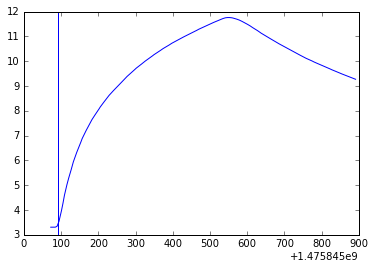

In [84]:
plot(40+np.linspace(uptime.min()-60,downtime.max()+60,1000),load_up)
#plot(downtime,load_down)
axvline(1475845092.034031)

(6, 12)

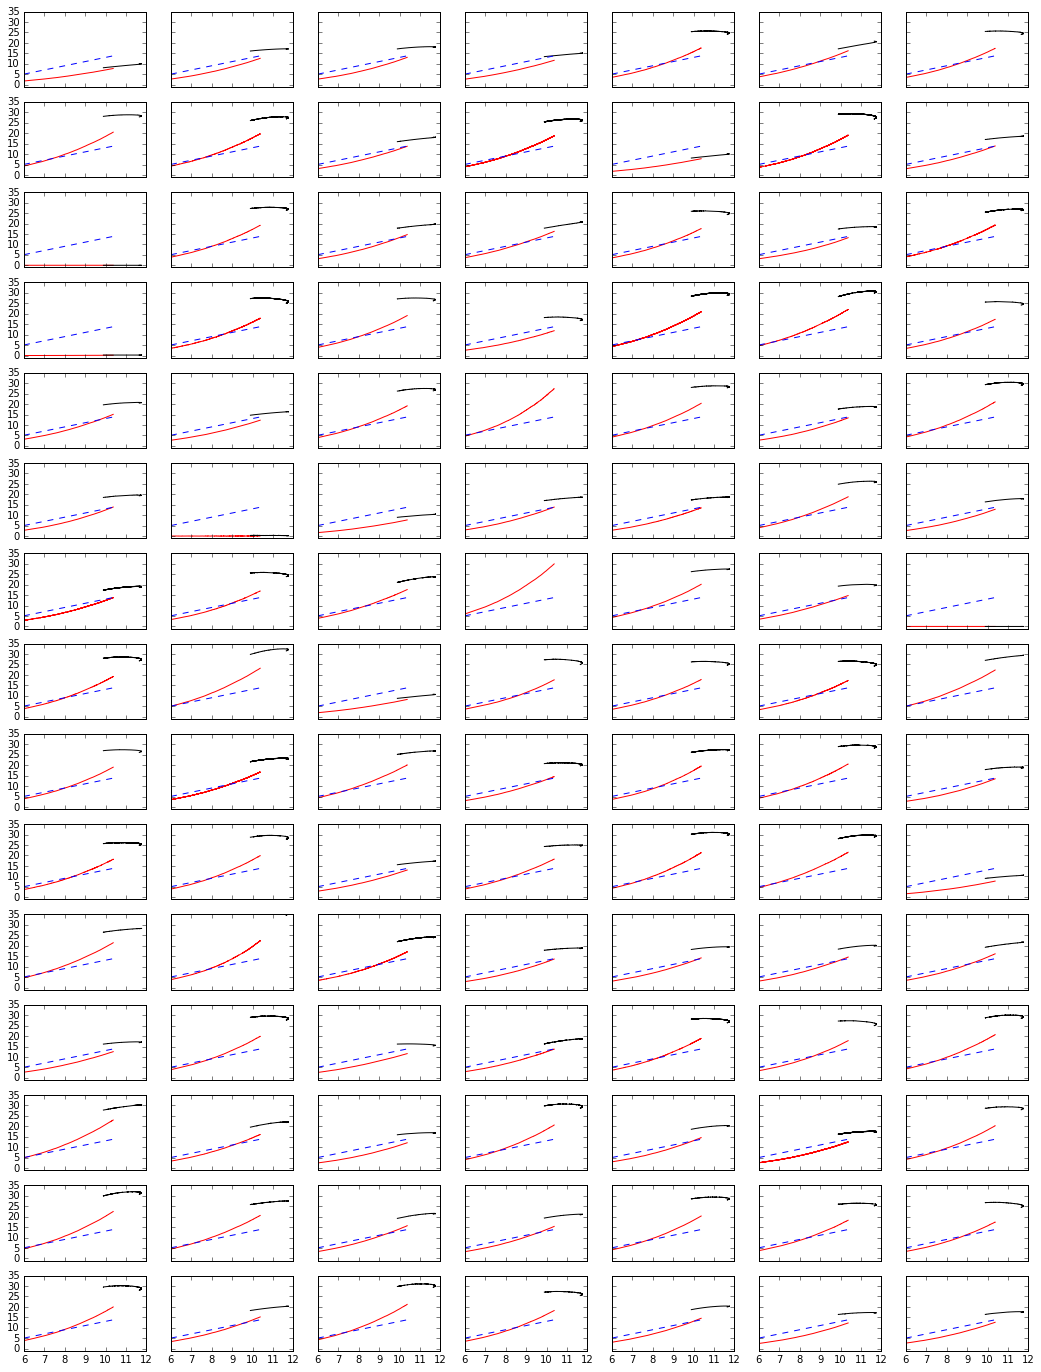

In [86]:
fig,axs = subplots(15,7,figsize=(18,24),sharex=True,sharey=True)
for k,ax in enumerate(axs.flatten()):
    ax.plot(load_up,upm[k,:]*1e6,'r')
    ax.plot(load_down,downm[k,:]*1e6,'k')
    ax.plot(load_up,(load_up-load_up.min())*2.0,'b--')
ax.set_ylim(-1,35)
ax.set_xlim(6,12)

In [7]:
s1.x.shape

(4194304,)

In [49]:
xb.shape

(128, 5243)

In [14]:
ss = ssa.sweep_stream(0)

In [15]:
ss.stream.start_epoch()

1475788731.7456779

In [16]:
stream_length=2**22/(512e6/2**15)

In [24]:
stream_length

268.435456

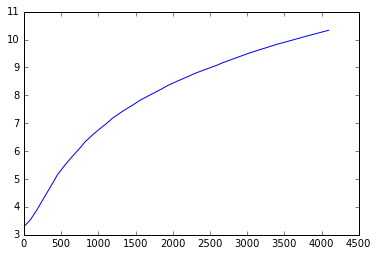

In [39]:
plot(load)

(0.01, 1.1)

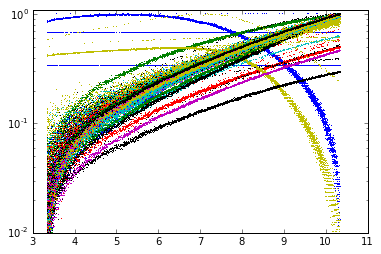

In [48]:
_=plot(load,xb.T,',')
yscale('log')
ylim(.01,1.1)

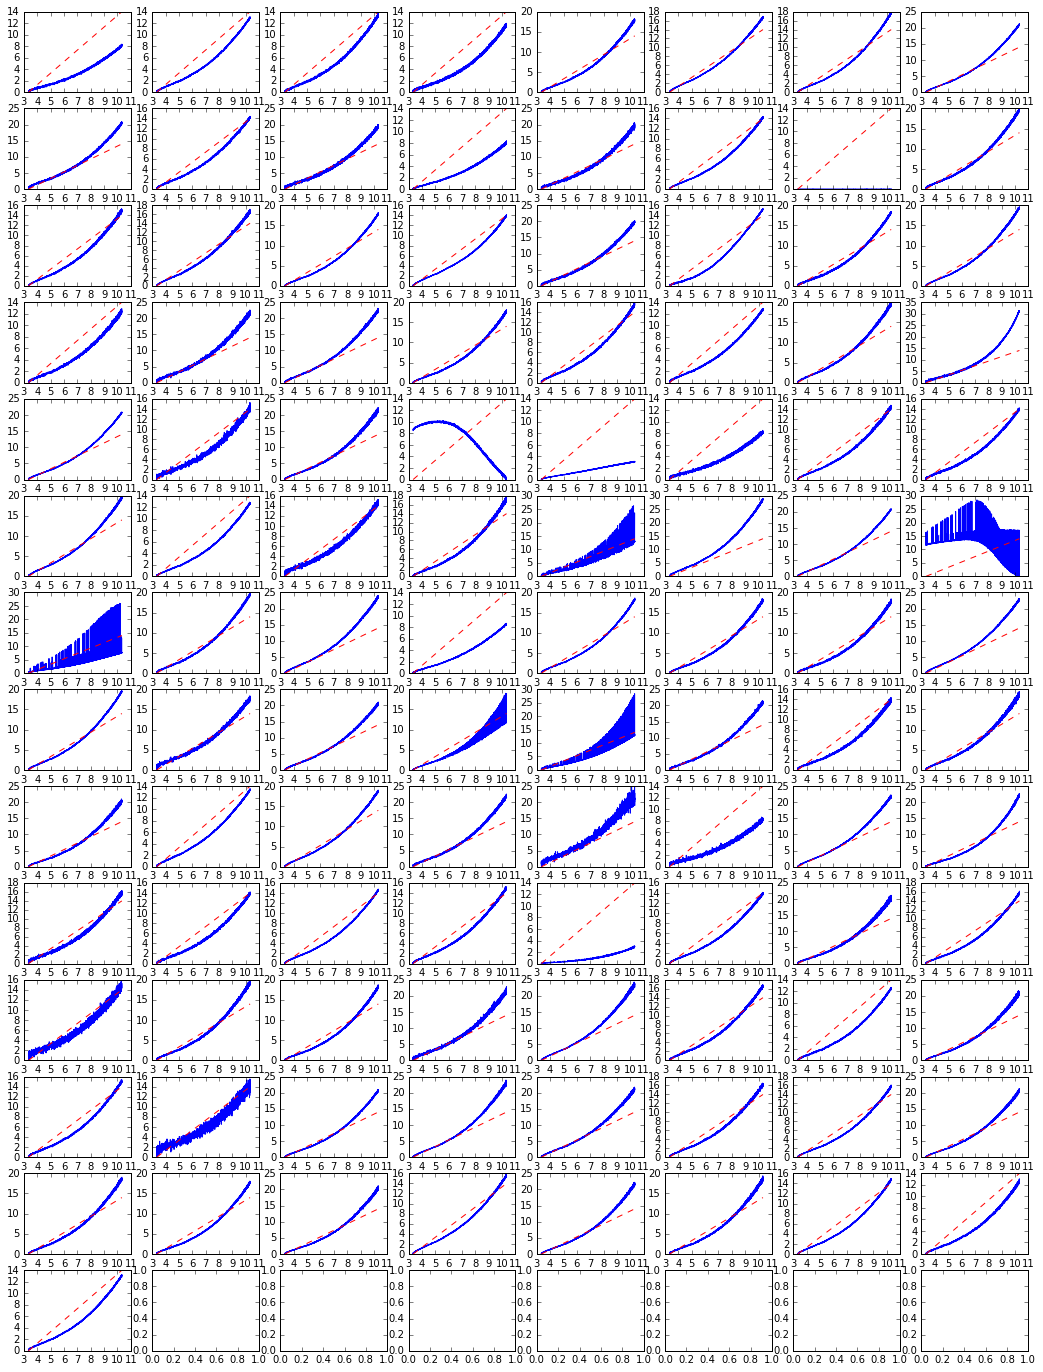

In [53]:
fig,axs = subplots(14,8,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    if k < 105:
        ax.plot(load,xm[k,:]*1e6)
        ax.plot(load,(load-load.min())*2.0,'r--')
        #ax.set_ylim(0,30)

In [28]:
xb.std(1).argmax()

14

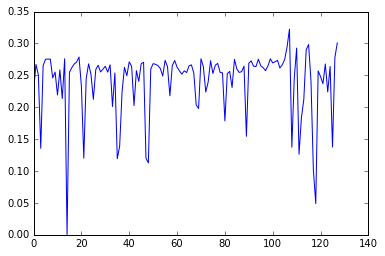

In [31]:
plot(xb.std(1))

In [29]:
xb[14,:]=0

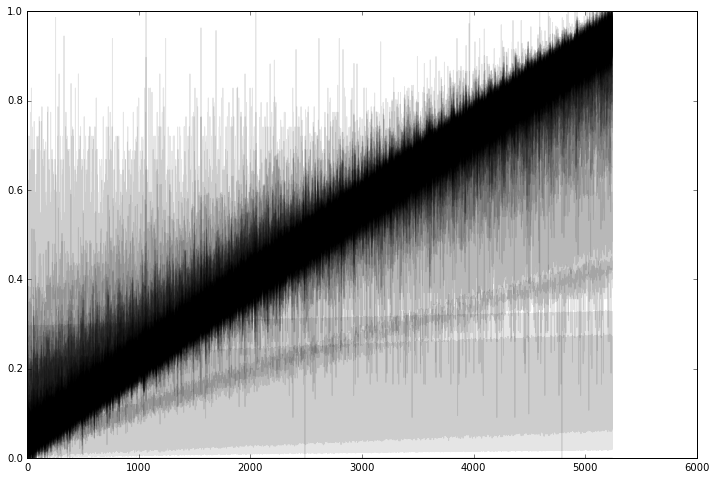

In [32]:
figure(figsize=(12,8))
_=plot(xb[:105,:].T,'k',alpha=0.1)

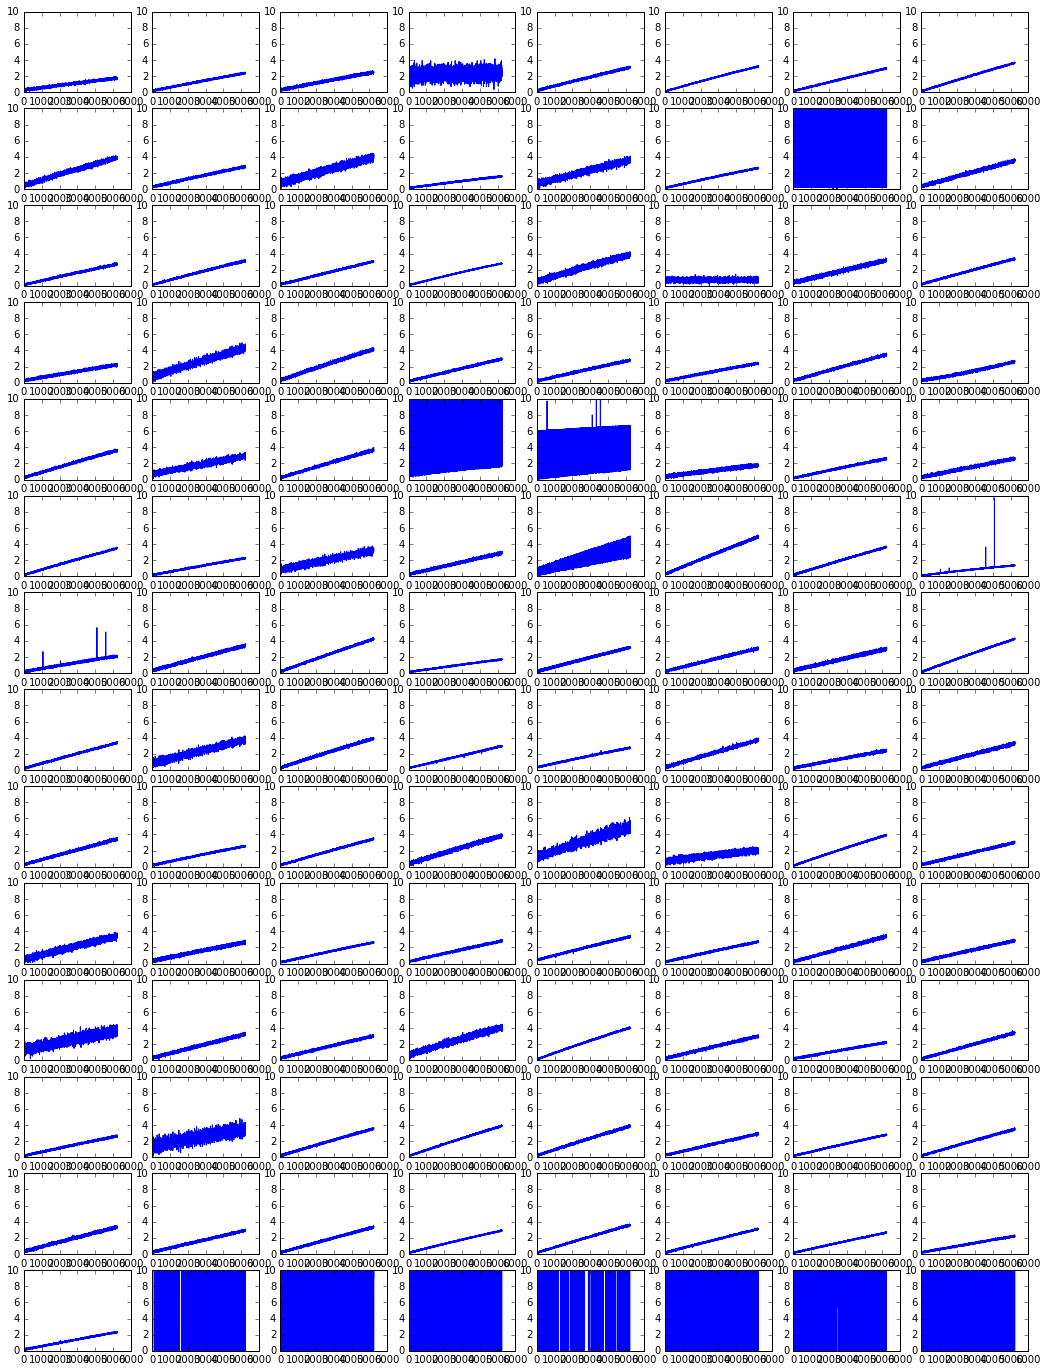

In [13]:
fig,axs = subplots(14,8,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    ss = ssa.sweep_stream(k)
    x = ss.x
    x = x - x.min()
    ax.plot(x[::100]*1e6)
    ax.set_ylim(0,10)